<a href="https://colab.research.google.com/github/nathencinoza/machine-learning/blob/main/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, top_k_accuracy_score # classification??
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_parquet('/content/drive/MyDrive/Orga 2/TP3/TP3 dataset music/train.parquet')
df.head(5)

,track_name,lyric,genre,language,popularity,artist,a_genres,a_songs,a_popularity,did,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Remember those walls I built\nWell baby they'r...,Dance,en,79,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Halo,Remember those walls I built\nWell baby they'r...,Pop,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
2,Halo,Remember those walls I built\nWell baby they'r...,R&B,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Partition,Driver roll up the partition please\nDriver ro...,Dance,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Partition,Driver roll up the partition please\nDriver ro...,Pop,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174


Elimino columnas que no voy a usar

In [28]:
df.drop(['track_name', 'did', 'a_genres'], axis = 1, inplace=True)

Separo el set de train con 80% de los artistas y el set de validación con el 20% de artistas restantes de manera aleatoria. Son 1072 artistas, 857 para train y 215 para valid. Y elimino la columna de artistas para ambos sets de datos.

In [29]:
from sklearn.model_selection import GroupShuffleSplit 
splitter = GroupShuffleSplit(test_size=0.2, n_splits=2, random_state = 142)
split = splitter.split(df, groups=df['artist'])
train_index, valid_index = next(split)

train = df.iloc[train_index]
valid = df.iloc[valid_index]

In [30]:
df['artist'].nunique(), train['artist'].nunique(), valid['artist'].nunique() 

(1072, 857, 215)

In [ ]:
train.drop('artist', axis=1, inplace=True)
valid.drop('artist', axis=1, inplace=True)

In [32]:
train.head(5)

,lyric,genre,language,popularity,a_songs,a_popularity,s-label,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Remember those walls I built\nWell baby they'r...,Dance,en,79,276.0,205.5,NaN,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Remember those walls I built\nWell baby they'r...,Pop,en,80,276.0,205.5,NaN,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
2,Remember those walls I built\nWell baby they'r...,R&B,en,80,276.0,205.5,NaN,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Driver roll up the partition please\nDriver ro...,Dance,en,71,276.0,205.5,NaN,0.0296,0.412,319467,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Driver roll up the partition please\nDriver ro...,Pop,en,71,276.0,205.5,NaN,0.0296,0.412,319467,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174


In [33]:
valid.head(5)

,lyric,genre,language,popularity,a_songs,a_popularity,s-label,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
143,"And you got me, like oh\nWhat you want from me...",Dance,en,73,246.0,51.2,NaN,0.07170,0.509,224000,0.637,0.000011,E,0.0789,-4.83,Minor,0.0471,172.006,3/4,0.378
144,"And you got me, like oh\nWhat you want from me...",Pop,en,74,246.0,51.2,NaN,0.07170,0.509,224000,0.637,0.000011,E,0.0789,-4.83,Minor,0.0471,172.006,3/4,0.378
145,"And you got me, like oh\nWhat you want from me...",R&B,en,74,246.0,51.2,NaN,0.07170,0.509,224000,0.637,0.000011,E,0.0789,-4.83,Minor,0.0471,172.006,3/4,0.378
146,Shine bright like a diamond\nShine bright like...,Dance,en,64,246.0,51.2,NaN,0.00125,0.564,225147,0.710,0.000000,B,0.1090,-4.92,Minor,0.0461,91.972,4/4,0.393
147,Shine bright like a diamond\nShine bright like...,Pop,en,65,246.0,51.2,NaN,0.00125,0.564,225147,0.710,0.000000,B,0.1090,-4.92,Minor,0.0461,91.972,4/4,0.393


Para deshacernos de los NaN:

* Para la columna de s-label los cambiamos por el promedio de la columna
* Para la columna language los cambiamos por el leguaje  más común
* Para la columna lyrics los llenamos con espacios vacíos. 

In [ ]:
train['lyric'] = train['lyric'].fillna("")
valid['lyric'] = valid['lyric'].fillna("")

train['language'] = train['language'].fillna(train['language'].value_counts().idxmax())
valid['language'] = valid['language'].fillna(train['language'].value_counts().idxmax())

train['s-label'] = train['s-label'].fillna(train['s-label'].mean())
valid['s-label'] = valid['s-label'].fillna(train['s-label'].mean())

# Encoding

Como la columna de key tiene un orden (c = 0, c# = 1, etc), cambiamos los valores de string por int. 

In [ ]:
train['key'] = train['key'].apply(lambda x: 0 if (x == 'C') else (1 if (x == 'C#') else (2 if (x == 'D') else (3 if (x == 'D#') else (4 if (x == 'E') else (5 if (x == 'F') else (6 if (x == 'F#') else (7 if (x == 'G') else (8 if (x == 'G#') else (9 if (x == 'A') else (10 if (x == 'A#') else 11)))))))))))
valid['key'] = valid['key'].apply(lambda x: 0 if (x == 'C') else (1 if (x == 'C#') else (2 if (x == 'D') else (3 if (x == 'D#') else (4 if (x == 'E') else (5 if (x == 'F') else (6 if (x == 'F#') else (7 if (x == 'G') else (8 if (x == 'G#') else (9 if (x == 'A') else (10 if (x == 'A#') else 11)))))))))))

La columna de lyrics la reemplazamos por la cantidad de caracteres que tienen las letras de las canciones. 


In [ ]:
train['lyric'] = train['lyric'].map(lambda x: len(x))
valid['lyric'] = valid['lyric'].map(lambda x: len(x))

Para language, mode y time_signature utilizaremos One Hot Encoding, ya que los diferentes valores de cada columna son pocos

In [37]:
df['language'].nunique(), df['mode'].nunique(), df['time_signature'].nunique()

(13, 2, 4)

In [ ]:
language_oneHotEncoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoded_language = language_oneHotEncoder.fit_transform(train[['language']]).todense().astype(int)
train = train.reset_index().drop(['index', 'language'],axis=1).join(pd.DataFrame(encoded_language, columns= language_oneHotEncoder.get_feature_names_out()))

encoded_language_valid = language_oneHotEncoder.transform(valid[['language']]).todense().astype(int)
valid = valid.reset_index().drop(['index', 'language'], axis=1).join(pd.DataFrame(encoded_language_valid, columns= language_oneHotEncoder.get_feature_names_out()))

In [39]:
time_signature_oneHotEncoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoded_time_signature = time_signature_oneHotEncoder.fit_transform(train[['time_signature']]).todense().astype(int)
train = train.reset_index().drop(['index', 'time_signature'],axis=1).join(pd.DataFrame(encoded_time_signature, columns= time_signature_oneHotEncoder.get_feature_names_out()))

encoded_time_signature_valid = time_signature_oneHotEncoder.transform(valid[['time_signature']]).todense().astype(int)
valid = valid.reset_index().drop(['index', 'time_signature'], axis=1).join(pd.DataFrame(encoded_time_signature_valid, columns= time_signature_oneHotEncoder.get_feature_names_out()))

In [40]:
mode_oneHotEncoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoded_mode = mode_oneHotEncoder.fit_transform(train[['mode']]).todense().astype(int)
train = train.reset_index().drop(['index', 'mode'],axis=1).join(pd.DataFrame(encoded_mode, columns= mode_oneHotEncoder.get_feature_names_out()))

encoded_mode_valid = mode_oneHotEncoder.transform(valid[['mode']]).todense().astype(int)
valid = valid.reset_index().drop(['index', 'mode'], axis=1).join(pd.DataFrame(encoded_mode_valid, columns= mode_oneHotEncoder.get_feature_names_out()))

In [41]:
train.head(5)

,lyric,genre,popularity,a_songs,a_popularity,s-label,acousticness,danceability,duration_ms,energy,...,language_is,language_it,language_pt,language_rw,language_su,language_tl,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Minor
0,1836,Dance,79,276.0,205.5,0.485105,0.2720,0.508,261640,0.720,...,0,0,0,0,0,0,0,1,0,1
1,1836,Pop,80,276.0,205.5,0.485105,0.2720,0.508,261640,0.720,...,0,0,0,0,0,0,0,1,0,1
2,1836,R&B,80,276.0,205.5,0.485105,0.2720,0.508,261640,0.720,...,0,0,0,0,0,0,0,1,0,1
3,1951,Dance,71,276.0,205.5,0.485105,0.0296,0.412,319467,0.441,...,0,0,0,0,0,0,0,1,0,1
4,1951,Pop,71,276.0,205.5,0.485105,0.0296,0.412,319467,0.441,...,0,0,0,0,0,0,0,1,0,1


In [42]:
valid.head(5)

,lyric,genre,popularity,a_songs,a_popularity,s-label,acousticness,danceability,duration_ms,energy,...,language_is,language_it,language_pt,language_rw,language_su,language_tl,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Minor
0,1597,Dance,73,246.0,51.2,0.485105,0.07170,0.509,224000,0.637,...,0,0,0,0,0,0,1,0,0,1
1,1597,Pop,74,246.0,51.2,0.485105,0.07170,0.509,224000,0.637,...,0,0,0,0,0,0,1,0,0,1
2,1597,R&B,74,246.0,51.2,0.485105,0.07170,0.509,224000,0.637,...,0,0,0,0,0,0,1,0,0,1
3,2041,Dance,64,246.0,51.2,0.485105,0.00125,0.564,225147,0.710,...,0,0,0,0,0,0,0,1,0,1
4,2041,Pop,65,246.0,51.2,0.485105,0.00125,0.564,225147,0.710,...,0,0,0,0,0,0,0,1,0,1


# Logistic regression

Separamos y dejamos en x_ las features a usar, y en y_ el género que es lo que queremos predecir, entrenamos nuestro modelo y buscamos los mejores hiperparametros.

In [43]:
x_train = train.drop('genre',axis=1)
y_train = train['genre']

x_valid = valid.drop('genre',axis=1)
y_valid = valid['genre']

In [ ]:
logistic_regression = LogisticRegression(random_state = 100)
logistic_regression.fit(x_train, y_train)

In [45]:
hiperparametros = {
    'max_iter': [500],
    'penalty': ['none', 'l2', 'l1'],
    'C': np.logspace(0, 4, 500),
    'solver': ['liblinear', 'lbfgs'],
    'random_state' : [100]
    }
model = RandomizedSearchCV(logistic_regression, hiperparametros, random_state = 100, n_iter = 5, scoring="accuracy")
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore

RandomizedSearchCV(estimator=LogisticRegression(random_state=100), n_iter=5,
                   param_distributions={'C': array([1.00000000e+00, 1.01862899e+00, 1.03760502e+00, 1.05693455e+00,
       1.07662418e+00, 1.09668060e+00, 1.11711065e+00, 1.13792129e+00,
       1.15911962e+00, 1.18071285e+00, 1.20270833e+00, 1.22511358e+00,
       1.24793621e+00, 1.27118400e+00, 1.29486487e+00, 1.31898690e+00,
       1.3...
       7.58157646e+03, 7.72281357e+03, 7.86668179e+03, 8.01323013e+03,
       8.16250851e+03, 8.31456781e+03, 8.46945981e+03, 8.62723729e+03,
       8.78795401e+03, 8.95166472e+03, 9.11842520e+03, 9.28829225e+03,
       9.46132376e+03, 9.63757866e+03, 9.81711702e+03, 1.00000000e+04]),
                                        'max_iter': [500],
                                        'penalty': ['none', 'l2', 'l1'],
                                        'random_state': [100],
                                        'solver': ['liblinear', 'lbfgs']},
                   rando

Mejor score de validación:

In [46]:
top_k_accuracy_score(y_valid, model.predict_proba(x_valid), k = 2,normalize = True, labels = model.classes_)

0.5075757575757576

Mejores hiperparametros: 

In [47]:
model.best_params_

{'solver': 'liblinear',
 'random_state': 100,
 'penalty': 'l1',
 'max_iter': 500,
 'C': 374.23662907219807}

Predicciones para test:

In [48]:
test = pd.read_parquet('/content/drive/MyDrive/Orga 2/TP3/TP3 dataset music/test.parquet')
test.drop(['track_name', 'did', 'a_genres'], axis = 1, inplace=True)

Hacemos exactamente lo mismo que hicimos para train y valid, sacamos NaNs y hacemos encoding. 

In [49]:
test['lyric'] = test['lyric'].fillna("")
test['language'] = test['language'].fillna(test['language'].value_counts().idxmax())
test['s-label'] = test['s-label'].fillna(test['s-label'].mean())

In [50]:
test['key'] = test['key'].apply(lambda x: 0 if (x == 'C') else (1 if (x == 'C#') else (2 if (x == 'D') else (3 if (x == 'D#') else (4 if (x == 'E') else (5 if (x == 'F') else (6 if (x == 'F#') else (7 if (x == 'G') else (8 if (x == 'G#') else (9 if (x == 'A') else (10 if (x == 'A#') else 11)))))))))))
test['lyric'] = test['lyric'].map(lambda x: len(x))

In [51]:
test.drop('artist', axis=1, inplace=True)

In [52]:
encoded_language_test = language_oneHotEncoder.transform(test[['language']]).todense().astype(int)
test = test.reset_index().drop(['index', 'language'], axis=1).join(pd.DataFrame(encoded_language_test, columns= language_oneHotEncoder.get_feature_names_out()))

encoded_time_signature_test = time_signature_oneHotEncoder.transform(test[['time_signature']]).todense().astype(int)
test = test.reset_index().drop(['index', 'time_signature'], axis=1).join(pd.DataFrame(encoded_time_signature_test, columns= time_signature_oneHotEncoder.get_feature_names_out()))

encoded_mode_test = mode_oneHotEncoder.transform(test[['mode']]).todense().astype(int)
test = test.reset_index().drop(['index', 'mode'], axis=1).join(pd.DataFrame(encoded_mode_test, columns= mode_oneHotEncoder.get_feature_names_out()))

In [53]:
x_test = test.drop('genre',axis=1)
y_test = test['genre']

In [54]:
top_k_accuracy_score(y_test, model.predict_proba(x_test), k = 2,normalize = True, labels = model.classes_)

0.4895057549085985

In [55]:
pd.DataFrame(model.predict_proba(x_test)).to_csv("/content/drive/MyDrive/Orga 2/TP3/Baseline/predicciones_baseline.csv")

Buscamos features más importantes

In [56]:
coeficientes = abs(model.best_estimator_.coef_)
importancia = np.sum(coeficientes, axis = 0)
importancia

array([2.19214800e-02, 1.94770036e+00, 1.35756238e-01, 1.91522556e+01,
       2.63935910e+01, 5.84264071e+01, 9.57151758e+01, 1.92590321e-04,
       5.53213162e+01, 1.08123812e+03, 2.73786653e+00, 3.72868123e+01,
       4.37383680e+00, 4.40657531e+02, 1.22896672e-01, 7.01482994e+01,
       8.53880515e+01, 3.92457805e+01, 1.04810125e+02, 7.71955263e+01,
       6.27259884e+01, 8.75469252e+01, 1.18463228e+02, 1.24494679e+02,
       1.30047204e+02, 6.59092937e+01, 6.42836509e+01, 2.54345797e+01,
       2.38897393e+01, 2.78777477e+01, 9.16207414e+00])

In [57]:
x_train.columns

Index(['lyric', 'popularity', 'a_songs', 'a_popularity', 's-label',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'language_de', 'language_en', 'language_es',
       'language_fr', 'language_ga', 'language_is', 'language_it',
       'language_pt', 'language_rw', 'language_su', 'language_tl',
       'time_signature_3/4', 'time_signature_4/4', 'time_signature_5/4',
       'mode_Minor'],
      dtype='object')

In [58]:
data = {'features': x_train.columns, 'importance': importancia}

In [59]:
df_graphic = pd.DataFrame(data).sort_values('importance', ascending = False).head(10)
df_graphic

,features,importance
9,instrumentalness,1081.238122
13,speechiness,440.657531
24,language_rw,130.047204
23,language_pt,124.494679
22,language_it,118.463228
18,language_es,104.810125
6,danceability,95.715176
21,language_is,87.546925
16,language_de,85.388052
19,language_fr,77.195526


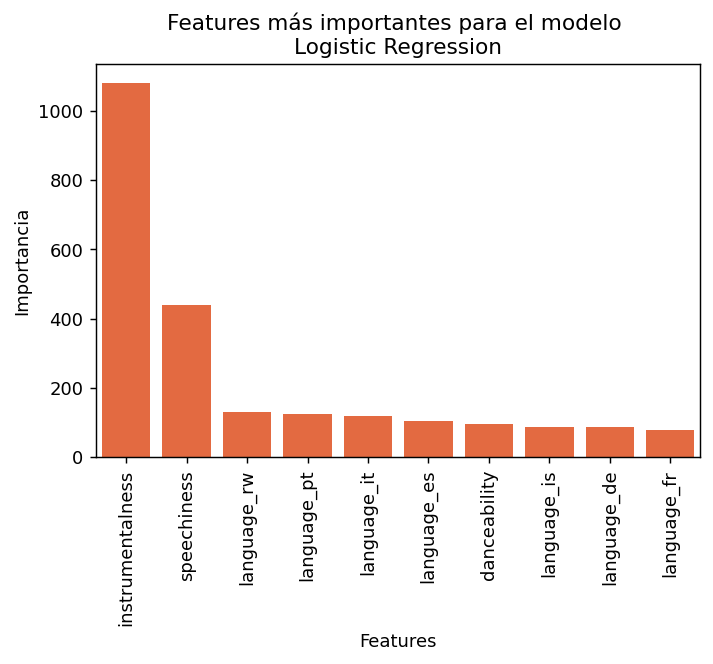

In [60]:
plt.figure(dpi=130)
sns.barplot(data = df_graphic, x = 'features', y = 'importance', palette =['#FE5D26'])
plt.title('Features más importantes para el modelo \nLogistic Regression')
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.show()